In [1]:
import pandas as pd
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Crear carpeta para guardar modelos
os.makedirs('./entrenamiento', exist_ok=True)

In [3]:
#Leer dataset de entrenamiento
data_path = '../data_sintetica/data_sintetica_sem3.csv'
df = pd.read_csv(data_path)

In [4]:
#Variables
X = df.drop(columns=['transporte'])
y = df['transporte']

In [5]:
#Variables categóricas -> dummies
X_encoded = pd.get_dummies(X, columns=['mineral'], drop_first=True)

In [6]:
# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [7]:
#Dividir para evaluación
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
#Modelo 1: árbol de decisión

arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol.fit(X_train, y_train)
joblib.dump(arbol, './entrenamiento/modelo_arbol.pkl')
print("Árbol de decisión entrenado y guardado")

Árbol de decisión entrenado y guardado


In [9]:
#Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, './entrenamiento/modelo_random.pkl')
print("Random Forest entrenado y guardado")

Random Forest entrenado y guardado


In [10]:
#Guardar scaler para uso de predicción
joblib.dump(scaler, './entrenamiento/scaler.pkl')
print("Scaler Guardado")

Scaler Guardado


In [11]:
#Evaluar modelos visualmente
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Precisión Árbol de Decisión 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

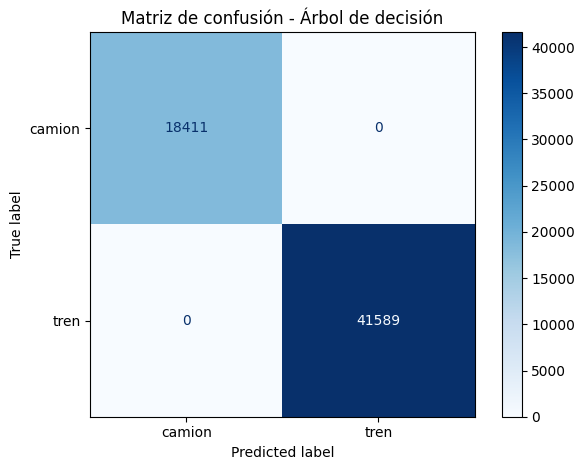

In [12]:
# Evaluación del Árbol de Decisión
y_pred_arbol = arbol.predict(X_test)
acc_arbol = accuracy_score(y_test, y_pred_arbol)
print(f"Precisión Árbol de Decisión {acc_arbol:.2f}" )

cm_arbol = confusion_matrix(y_test, y_pred_arbol, labels=arbol.classes_)
disp_arbol = ConfusionMatrixDisplay(confusion_matrix=cm_arbol, display_labels=arbol.classes_)
disp_arbol.plot(cmap='Blues')
plt.title("Matriz de confusión - Árbol de decisión")
plt.tight_layout()
plt.show

Precisión Random Forest: 1.00


<function matplotlib.pyplot.show(close=None, block=None)>

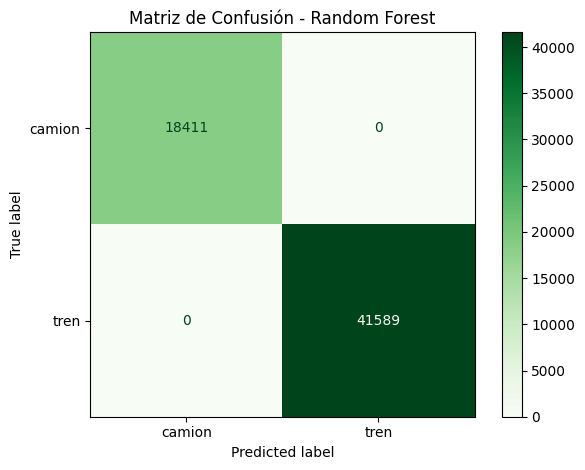

In [13]:
# Evaluación del random forest

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión Random Forest: {acc_rf:.2f}")

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show